# <font color=blue>Assignments for "Plotting Basic Charts With Matplotlib"</font>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

1. Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('owid-covid-data.csv', parse_dates = ["date"], low_memory = False)
data.head()


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
data.groupby('location').total_cases.sum().sort_values(ascending = False).head(21)

location
World             841943443.0
United States     228499940.0
Brazil             91984938.0
Russia             46297205.0
India              42424067.0
Spain              27896924.0
United Kingdom     27531280.0
Italy              26990776.0
Germany            20998575.0
Peru               19669260.0
Iran               19632866.0
Turkey             18132258.0
France             17406939.0
Chile              16508554.0
Mexico             15348861.0
China              14264297.0
Pakistan           13104581.0
Saudi Arabia       12633374.0
South Africa       11628516.0
Canada              9314543.0
Bangladesh          8983879.0
Name: total_cases, dtype: float64

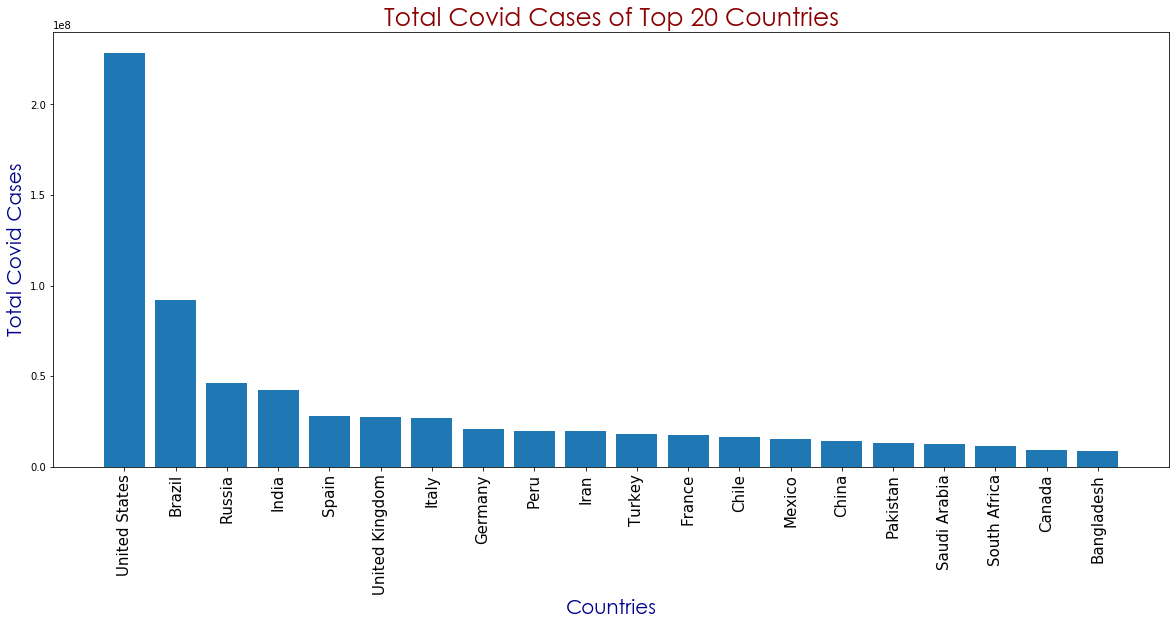

In [12]:
data_max_21 = data.groupby('location').total_cases.sum().sort_values(ascending = False).head(21)
data_max_20 = data_max_21[1:21]

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 25 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 20 }

plt.figure(figsize=(20, 8))
plt.bar(data_max_20.index, data_max_20)

plt.xticks(rotation = 90, fontsize = 15)

plt.xlabel('Countries',fontdict = axis_style)
plt.ylabel('Total Covid Cases', fontdict = axis_style)

plt.title('Total Covid Cases of Top 20 Countries', fontdict = title_style)

plt.show()


2. Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

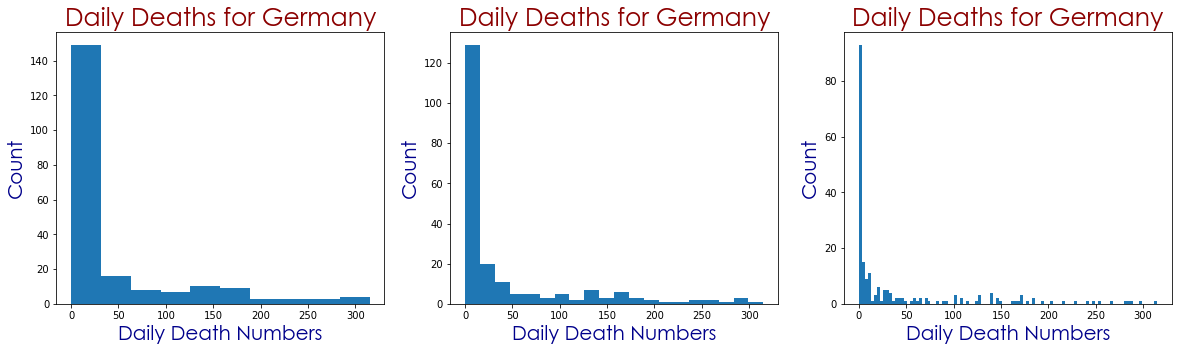

In [14]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.hist(data[data.location == 'Germany'].new_deaths, bins = 10 )
plt.title('Daily Deaths for Germany', fontdict = title_style)
plt.xlabel('Daily Death Numbers', fontdict = axis_style)
plt.ylabel('Count', fontdict = axis_style)

plt.subplot(1,3,2)
plt.hist(data[data.location == 'Germany'].new_deaths, bins = 20 )
plt.title('Daily Deaths for Germany', fontdict = title_style)
plt.xlabel('Daily Death Numbers', fontdict = axis_style)
plt.ylabel('Count', fontdict = axis_style)

plt.subplot(1,3,3)
plt.hist(data[data.location == 'Germany'].new_deaths, bins = 100 )
plt.title('Daily Deaths for Germany', fontdict = title_style)
plt.xlabel('Daily Death Numbers', fontdict = axis_style)
plt.ylabel('Count', fontdict = axis_style)

plt.show()

3. Plot a scatter plot of new cases and new death for Germany and France.

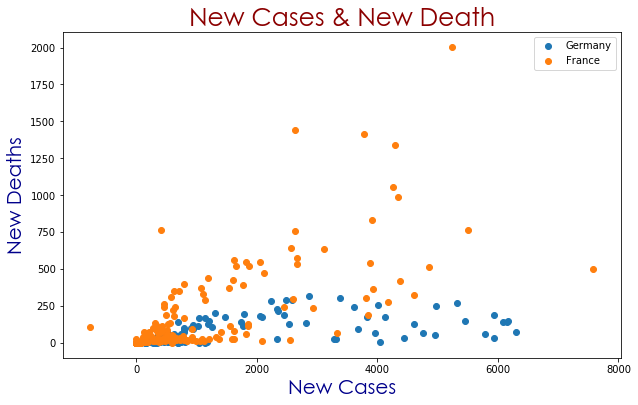

In [15]:
plt.figure(figsize=(10, 6))
plt.title('New Cases & New Death', fontdict = title_style)
for location in ['Germany', 'France']:
    plt.scatter(data[data.location == location].new_cases, 
                data[data.location == location].new_deaths, label = location)
plt.xlabel('New Cases',fontdict = axis_style)
plt.ylabel('New Deaths', fontdict = axis_style)
plt.legend()
plt.show()

4. Plot a boxplot for daily deaths for any country you choose.

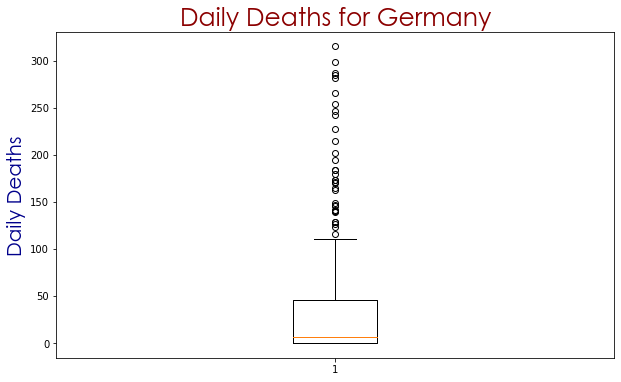

In [20]:
## this plot does not seem well. I plot a different variable below. 

plt.figure(figsize=(10, 6))
plt.title('Daily Deaths for Germany', fontdict = title_style)
plt.boxplot(data[data.location == 'Germany']['new_deaths'].dropna())   
plt.ylabel('Daily Deaths',fontdict = axis_style)

plt.show()

5. Calculate the total case for each continent and plot a pie chart 

In [18]:
sorted_by_cont = data.groupby('continent').total_cases.sum().sort_values()
continents = sorted_by_cont.index.array
continents

<PandasArray>
['Oceania', 'Africa', 'South America', 'Asia', 'Europe', 'North America']
Length: 6, dtype: object

In [50]:
##continents = data.continent.unique()
##continents[0:-1]

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [57]:
##continents = ['Oceania','Africa','South America','Asia','Europe','North America']

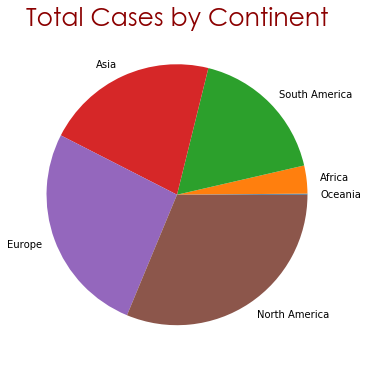

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Total Cases by Continent', fontdict = title_style)
data_cont= data.groupby('continent').total_cases.sum().sort_values()
plt.pie(data_cont, labels = continents)
plt.show()